# Görüntü

In [34]:
from IPython.display import Image
Image(filename='test.png')

# Resmin encode edilmesi

In [17]:
import numpy as np
import cv2
import math
from matplotlib import pyplot as plt

# Sliding window implementation of receptive field
w = np.zeros([5,5])
pot = np.zeros([16,16])
ran = [-2,-1,0,1,2]
ox = 2
oy = 2
w[ox][oy] = 1


for i in range(5):
    for j in range(5):
        d = abs(ox-i) + abs(oy-j)
    w[i][j] = (-0.375)*d + 1

#
print("-----------------------------------------------------------------")
print("W",w)
print("-----------------------------------------------------------------")

#
    
#reading dataset image (16x16)
img = cv2.imread('test.png',0)

#
print("-----------------------------------------------------------------")
print("img",img)
print("-----------------------------------------------------------------")

#

#calculating potential map of the image (256 input neuron potential)
for i in range(16):
    for j in range(16):
        summ = 0
        for m in ran:
            for n in ran:
                if (i+m)>=0 and (i+m)<=15 and (j+n)>=0 and (j+n)<=15:
                    summ = summ + w[ox+m][oy+n]*img[i+m][j+n]
        pot[i][j] = summ
    
#
print("-----------------------------------------------------------------")
print("pot",pot)
print("-----------------------------------------------------------------")

#


#defining time frame of 1s with steps of 5ms
T = 1;
dt = 0.005
time  = np.arange(0, T+dt, dt)

#initializing spike train
train = []

for l in range(16):
    for m in range(16):

        temp = np.zeros([201,])
        #calculating firing rate proportional to the membrane potential
        freq = math.ceil(0.102*pot[l][m] + 52.02)
        freq1 = math.ceil(200/freq)

        #generating spikes according to the firing rate
        k = 0
        while k<200:
            temp[k] = 1
            k = k + freq1
        train.append(temp)


-----------------------------------------------------------------
W [[ 0.     0.     0.     0.    -0.5  ]
 [ 0.     0.     0.     0.    -0.125]
 [ 0.     0.     1.     0.     0.25 ]
 [ 0.     0.     0.     0.    -0.125]
 [ 0.     0.     0.     0.    -0.5  ]]
-----------------------------------------------------------------
-----------------------------------------------------------------
img [[  0   0   0   0   0   0 255 255 255 255 255 255 255 255   0   0]
 [  0   0   0   0   0 255 255 255 255 255 255   0 255 255   0   0]
 [  0   0   0   0 255 255 255 255 255 255   0   0   0 255 255   0]
 [  0   0   0 255 255 255 255 255   0   0   0   0 255 255 255 255]
 [  0   0   0 255 255 255 255   0 255 255 255 255 255 255 255   0]
 [  0   0   0 255 255 255   0 255 255 255 255 255   0 255 255   0]
 [  0   0 255 255 255 255 255 255 255 255   0   0   0 255 255   0]
 [  0   0 255 255 255 255 255 255   0   0   0   0 255 255   0   0]
 [  0 255 255 255 255 255 255   0   0   0   0   0 255 255   0   0]
 [

In [35]:
#calculating potential map of the image (256 input neuron potential)
for i in range(16):
    for j in range(16):
        
        summ = 0
        for m in ran:
            for n in ran:
                if (i+m)>=0 and (i+m)<=15 and (j+n)>=0 and (j+n)<=15:
#                     print("Summ(Önceki)",summ)
#                     print("+")
#                     print("w[ox+m][oy+n] ",w[ox+m][oy+n])
#                     print("*")
#                     print("img[i+m][j+n] ",img[i+m][j+n])
                    summ = summ + w[ox+m][oy+n]*img[i+m][i+m]
#                     print("Summ(son)",summ)
#                     print("- - - - -- - - - - - -- - - - --  -- - - ")
#                     import time
#                     time.sleep(5)
                    print("W",(ox+m,oy+n),"img",(i+m,j+n))
                    
        pot[i][j] = summ
        print("Sum:",summ)
    print("::::::::::::::::::::::::::::::::::::::::::")
    break
   
    
    

W (2, 2) img (0, 0)
W (2, 3) img (0, 1)
W (2, 4) img (0, 2)
W (3, 2) img (1, 0)
W (3, 3) img (1, 1)
W (3, 4) img (1, 2)
W (4, 2) img (2, 0)
W (4, 3) img (2, 1)
W (4, 4) img (2, 2)
Sum: 0.0
W (2, 1) img (0, 0)
W (2, 2) img (0, 1)
W (2, 3) img (0, 2)
W (2, 4) img (0, 3)
W (3, 1) img (1, 0)
W (3, 2) img (1, 1)
W (3, 3) img (1, 2)
W (3, 4) img (1, 3)
W (4, 1) img (2, 0)
W (4, 2) img (2, 1)
W (4, 3) img (2, 2)
W (4, 4) img (2, 3)
Sum: 0.0
W (2, 0) img (0, 0)
W (2, 1) img (0, 1)
W (2, 2) img (0, 2)
W (2, 3) img (0, 3)
W (2, 4) img (0, 4)
W (3, 0) img (1, 0)
W (3, 1) img (1, 1)
W (3, 2) img (1, 2)
W (3, 3) img (1, 3)
W (3, 4) img (1, 4)
W (4, 0) img (2, 0)
W (4, 1) img (2, 1)
W (4, 2) img (2, 2)
W (4, 3) img (2, 3)
W (4, 4) img (2, 4)
Sum: 0.0
W (2, 0) img (0, 1)
W (2, 1) img (0, 2)
W (2, 2) img (0, 3)
W (2, 3) img (0, 4)
W (2, 4) img (0, 5)
W (3, 0) img (1, 1)
W (3, 1) img (1, 2)
W (3, 2) img (1, 3)
W (3, 3) img (1, 4)
W (3, 4) img (1, 5)
W (4, 0) img (2, 1)
W (4, 1) img (2, 2)
W (4, 2) img 

In [39]:
#defining time frame of 1s with steps of 5ms
T = 1;
dt = 0.005
time  = np.arange(0, T+dt, dt)

#initializing spike train
train = []

for l in range(16):
    for m in range(16):
        temp = np.zeros([201,])
        #calculating firing rate proportional to the membrane potential
        print("pot[l][m]",pot[l][m])
        freq = math.ceil(0.102*pot[l][m] + 52.02)
        print("freq :",freq)
        freq1 = math.ceil(200/freq)
        print("freq1 :",freq1)

        #generating spikes according to the firing rate
        k = 0
        while k<200:
            print(".....")
            print(k)
            temp[k] = 1
            k = k + freq1
            
        print("Temp(Her bir piksel için spike train) :",temp)    
        train.append(temp)
        break
    break
    #print("--------------",l,"-------------------")


pot[l][m] 0.0
freq : 53
freq1 : 4
.....
0
.....
4
.....
8
.....
12
.....
16
.....
20
.....
24
.....
28
.....
32
.....
36
.....
40
.....
44
.....
48
.....
52
.....
56
.....
60
.....
64
.....
68
.....
72
.....
76
.....
80
.....
84
.....
88
.....
92
.....
96
.....
100
.....
104
.....
108
.....
112
.....
116
.....
120
.....
124
.....
128
.....
132
.....
136
.....
140
.....
144
.....
148
.....
152
.....
156
.....
160
.....
164
.....
168
.....
172
.....
176
.....
180
.....
184
.....
188
.....
192
.....
196
Temp(Her bir piksel için spike train) : [1. 0. 0. 0. 1. 0. 0. 0. 1. 0. 0. 0. 1. 0. 0. 0. 1. 0. 0. 0. 1. 0. 0. 0.
 1. 0. 0. 0. 1. 0. 0. 0. 1. 0. 0. 0. 1. 0. 0. 0. 1. 0. 0. 0. 1. 0. 0. 0.
 1. 0. 0. 0. 1. 0. 0. 0. 1. 0. 0. 0. 1. 0. 0. 0. 1. 0. 0. 0. 1. 0. 0. 0.
 1. 0. 0. 0. 1. 0. 0. 0. 1. 0. 0. 0. 1. 0. 0. 0. 1. 0. 0. 0. 1. 0. 0. 0.
 1. 0. 0. 0. 1. 0. 0. 0. 1. 0. 0. 0. 1. 0. 0. 0. 1. 0. 0. 0. 1. 0. 0. 0.
 1. 0. 0. 0. 1. 0. 0. 0. 1. 0. 0. 0. 1. 0. 0. 0. 1. 0. 0. 0. 1. 0. 0. 0.
 1. 0. 0. 0. 1. 

In [20]:
print(img.shape,pot.shape) 

(16, 16) (16, 16)


In [33]:
len(train) #256 piksel(256 giriş nöronu)

256

In [22]:
len(train[0]) # 0. satır 0. sutün daki pikeslin  1sn de 5ms sanye aralıklarıyla oluşon spike train in uzunluğu

201

0


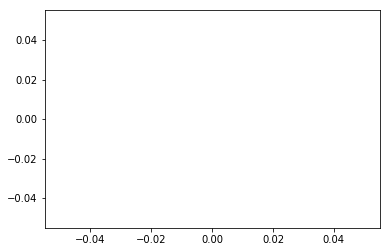

In [26]:
print(img[0][0]) # 0. satır 0. sutün daki pikeslin degeri
plt.plot(img[0][0])

0.0


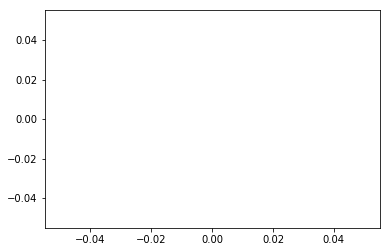

In [27]:
print(pot[0][0])#  0. satır 0. sutün daki pikeslin pot degeri
plt.plot(pot[0][0])

[1. 0. 0. 0. 1. 0. 0. 0. 1. 0. 0. 0. 1. 0. 0. 0. 1. 0. 0. 0. 1. 0. 0. 0.
 1. 0. 0. 0. 1. 0. 0. 0. 1. 0. 0. 0. 1. 0. 0. 0. 1. 0. 0. 0. 1. 0. 0. 0.
 1. 0. 0. 0. 1. 0. 0. 0. 1. 0. 0. 0. 1. 0. 0. 0. 1. 0. 0. 0. 1. 0. 0. 0.
 1. 0. 0. 0. 1. 0. 0. 0. 1. 0. 0. 0. 1. 0. 0. 0. 1. 0. 0. 0. 1. 0. 0. 0.
 1. 0. 0. 0. 1. 0. 0. 0. 1. 0. 0. 0. 1. 0. 0. 0. 1. 0. 0. 0. 1. 0. 0. 0.
 1. 0. 0. 0. 1. 0. 0. 0. 1. 0. 0. 0. 1. 0. 0. 0. 1. 0. 0. 0. 1. 0. 0. 0.
 1. 0. 0. 0. 1. 0. 0. 0. 1. 0. 0. 0. 1. 0. 0. 0. 1. 0. 0. 0. 1. 0. 0. 0.
 1. 0. 0. 0. 1. 0. 0. 0. 1. 0. 0. 0. 1. 0. 0. 0. 1. 0. 0. 0. 1. 0. 0. 0.
 1. 0. 0. 0. 1. 0. 0. 0. 0.]


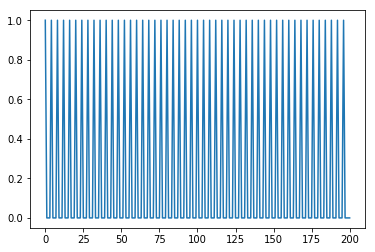

In [25]:
print(train[0]) # 0. satır 0. sutün daki pikeslin  1sn de 5ms sanye aralıklarıyla oluşon spike train i
plt.plot(train[0])